In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('BlackFriday.csv')
df.head()
df.isnull().sum()
del(df['Product_Category_2'])
del(df['Product_Category_3'])

df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [2]:
df['User_ID'].nunique()

5891

df.columns

In [3]:
for column in df.columns:
    print(column,'',df[column].nunique())

User_ID  5891
Product_ID  3623
Gender  2
Age  7
Occupation  21
City_Category  3
Stay_In_Current_City_Years  5
Marital_Status  2
Product_Category_1  18
Purchase  17959


<AxesSubplot:ylabel='Ratio'>

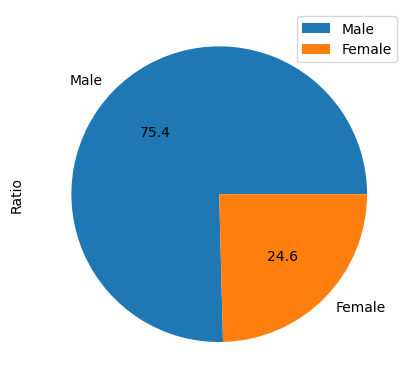

In [4]:
data = pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])
data.plot.pie(y='Ratio',autopct='%.1f')

<AxesSubplot:ylabel='None'>

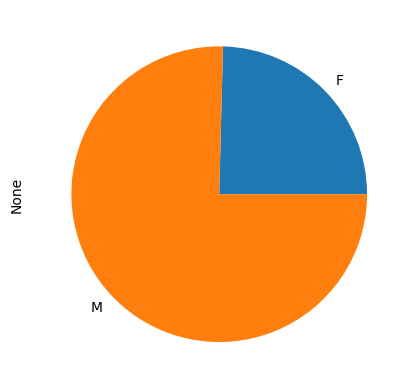

In [5]:
df.groupby('Gender').size().plot(kind='pie')

<AxesSubplot:ylabel='Purchase'>

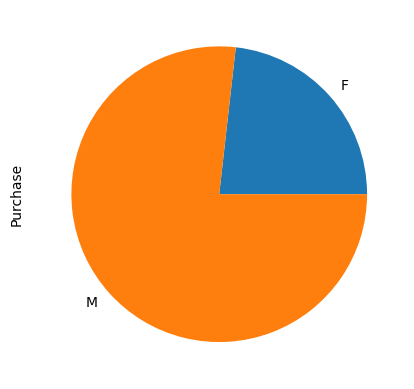

In [6]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie')

<AxesSubplot:ylabel='Purchase'>

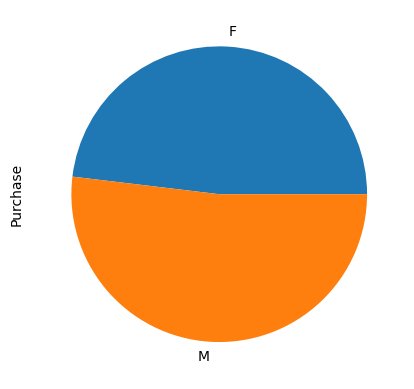

In [7]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie')

<AxesSubplot:xlabel='Age'>

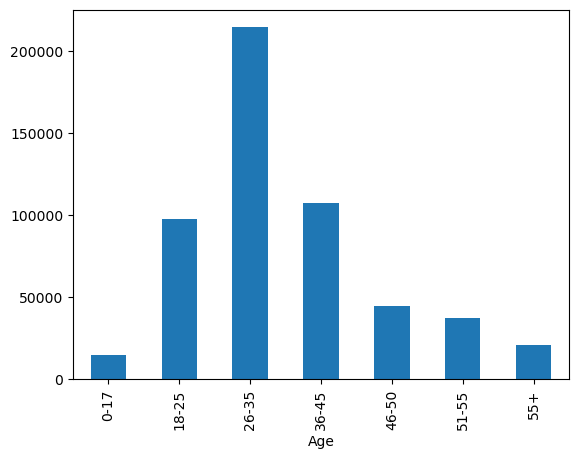

In [8]:
df.groupby('Age').size().plot(kind='bar')

In [9]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
lst

[['0-17', 2300],
 ['55+', 2573],
 ['26-35', 3419],
 ['46-50', 3099],
 ['51-55', 2877],
 ['36-45', 3318],
 ['18-25', 3213]]

<AxesSubplot:xlabel='Age'>

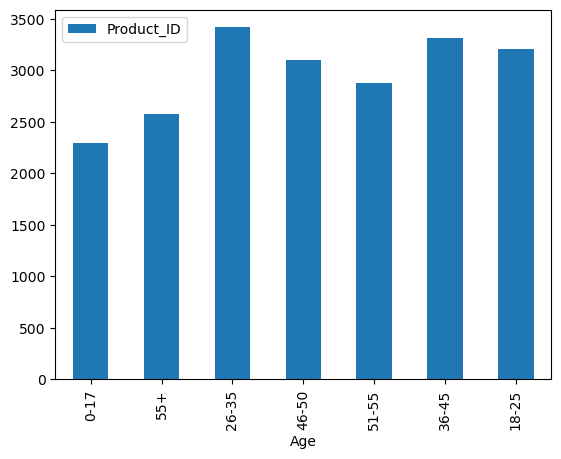

In [10]:
data=pd.DataFrame(lst,columns=['Age','Product_ID'])
data.plot(kind='bar',x='Age')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

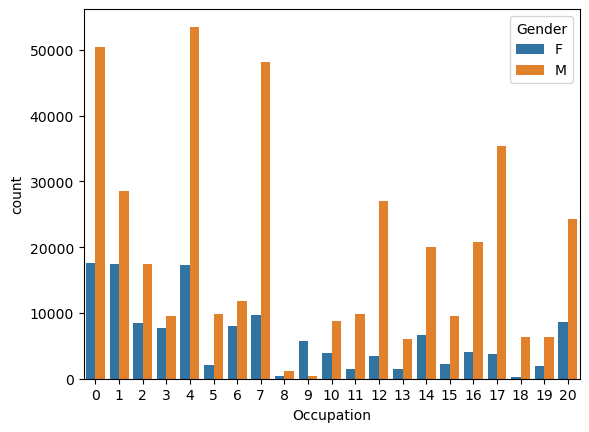

In [11]:
sns.countplot(x='Occupation', hue ="Gender", data=df)

<AxesSubplot:xlabel='Occupation'>

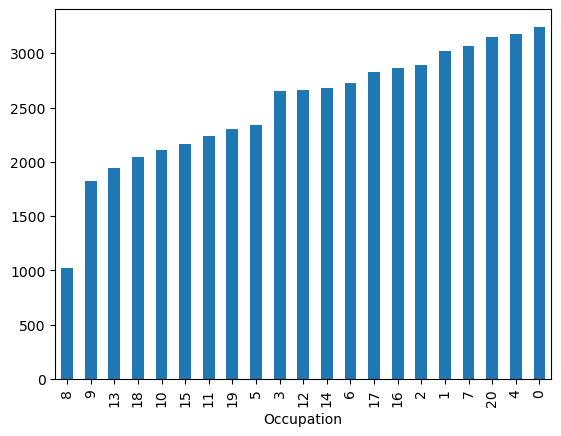

In [12]:
df.groupby('Occupation').nunique()["Product_ID"].sort_values().plot(kind="bar")

<AxesSubplot:xlabel='Product_Category_1'>

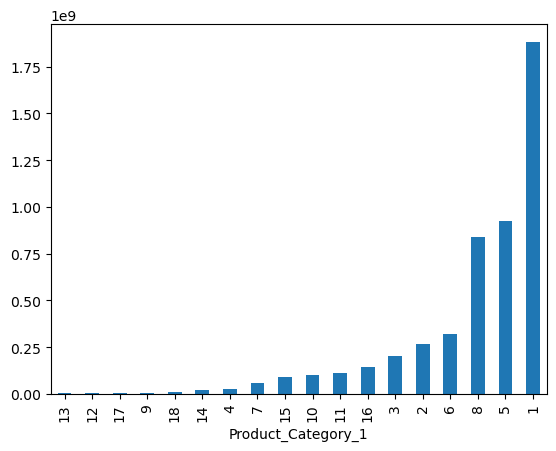

In [14]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

In [26]:
l=[]

for i in range(len(df)):
    l.append(df['Gender'][i] + "_" +str(df['Marital_Status'][i]))
print(l)
   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
df['MaritalGender']=l

In [29]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGende
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='MaritalGender', ylabel='count'>

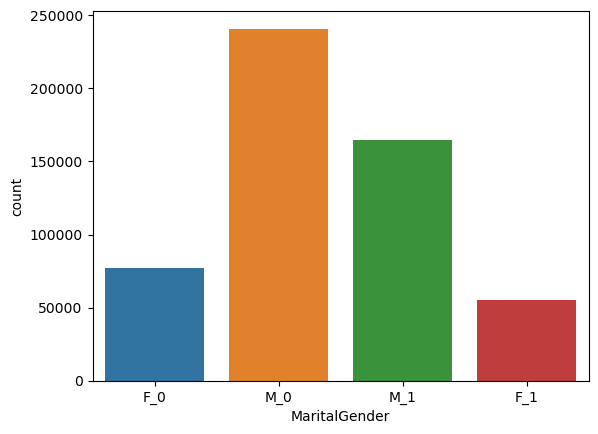

In [31]:
sns.countplot(x=df["MaritalGender"])

<AxesSubplot:xlabel='Age', ylabel='count'>

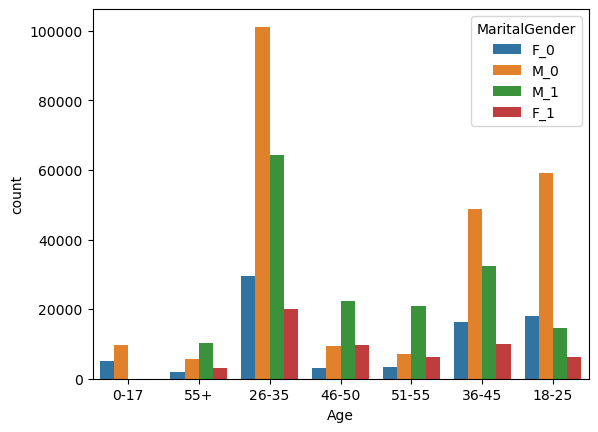

In [32]:
sns.countplot(x=df["Age"] , hue=df['MaritalGender'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

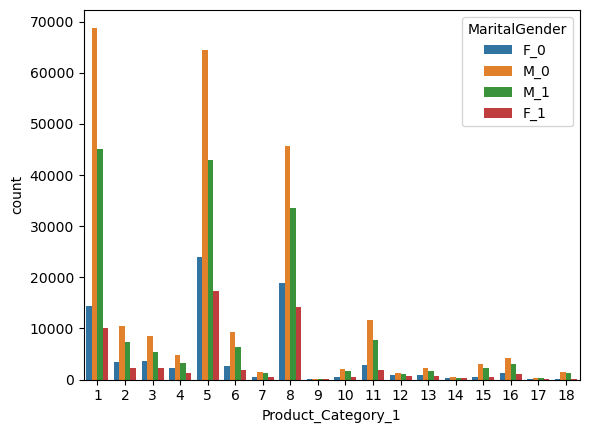

In [33]:
sns.countplot(x=df["Product_Category_1"], hue=df["MaritalGender"])